# Natural Language Processing

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

# The Data

In [2]:
reviews = pd.read_csv('Reviews.csv')
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [21]:
reviews.dropna(inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
 10  Text Length             568411 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 52.0+ MB


In [23]:
reviews['Text Length'] = reviews['Text'].apply(len)
reviews['Summary Length'] = reviews['Summary'].apply(len)

reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text Length,Summary Length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,21
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,17
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,21
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,14
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,11


# EDA

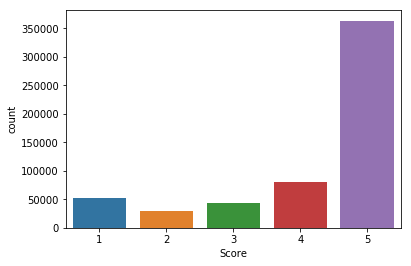

In [12]:
sns.countplot('Score', data=reviews)

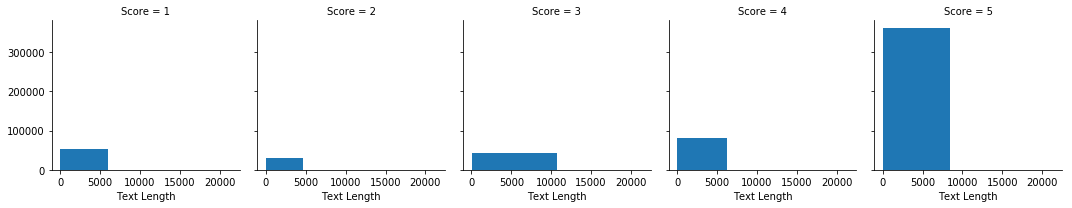

In [18]:
grid = sns.FacetGrid(reviews, col='Score')
grid = grid.map(plt.hist, 'Text Length', bins=2)

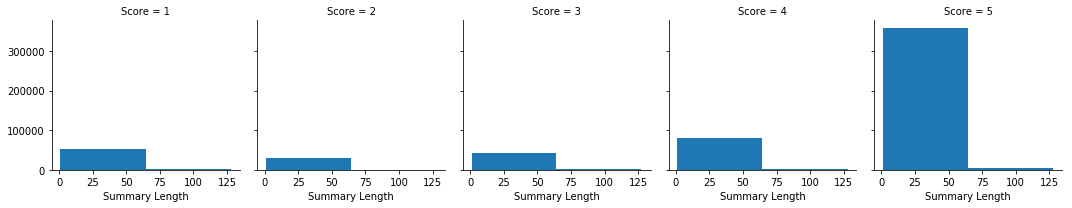

In [24]:
grid = sns.FacetGrid(reviews, col='Score')
grid = grid.map(plt.hist, 'Summary Length', bins=2)

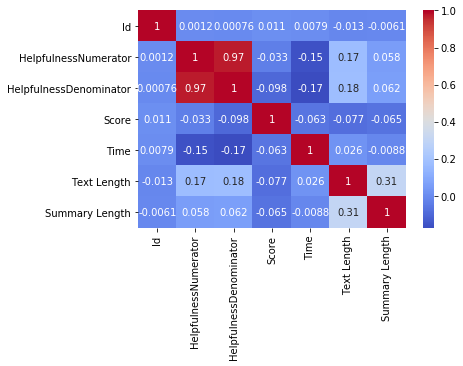

In [27]:
sns.heatmap(reviews.corr(), cmap='coolwarm', annot=True)

In [25]:
reviews_groupBy_score = reviews.groupby(by='Score')
reviews_groupBy_score.mean()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time,Text Length,Summary Length
Score,,,,,,
1,282277.896047,2.735133,4.869738,1.303159e+09,478.088608,24.467071
2,280775.355277,1.859799,3.085264,1.301239e+09,490.961873,24.917258
3,279643.956893,1.701018,2.466485,1.300125e+09,520.337680,26.076200
4,281713.258608,1.390292,1.666084,1.296722e+09,496.603273,24.828988
5,285887.479828,1.675273,1.874160,1.294305e+09,402.453410,22.563907


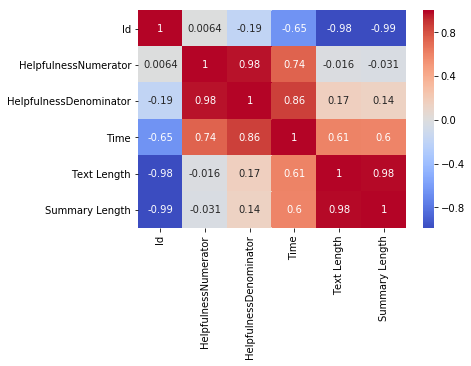

In [26]:
sns.heatmap(reviews_groupBy_score.mean().corr(), cmap='coolwarm', annot=True)

# Pre-Processing

In [ ]:
# unigram = CountVectorizer(ngram_range=(1,1))
# bigram = CountVectorizer(ngram_range=(2,2))
# tfidf = TfidfVectorizer(ngram_range=(1,1))

# Train, Test, Split

In [31]:
unigram_feat = CountVectorizer(ngram_range=(1,1)).fit_transform(reviews['Text'])
bigram_feat = CountVectorizer(ngram_range=(2,2)).fit_transform(reviews['Text'])
tfidf_feat = TfidfVectorizer(ngram_range=(1,1)).fit_transform(reviews['Text'])

In [32]:
feat_list = [unigram_feat, bigram_feat, tfidf_feat]
feat_name = ["Fitur Unigram", "Fitur Bigram", "Fitur TF-IDF"]

all_report = []
all_matrix = []
for feat, name in zip(feat_list, feat_name):
    X = feat
    y = reviews['Score']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    predict = nb.predict(X_test)
    
    all_report.append(classification_report(y_test, predict))
    all_matrix.append(confusion_matrix(y_test, predict))

In [36]:
for report in all_report:
    print(report)
    print('\n')

             precision    recall  f1-score   support

          1       0.56      0.65      0.60     17194
          2       0.42      0.21      0.28      9866
          3       0.41      0.31      0.35     13799
          4       0.39      0.38      0.39     26629
          5       0.83      0.87      0.85    120088

avg / total       0.69      0.70      0.69    187576



             precision    recall  f1-score   support

          1       0.80      0.61      0.69     17194
          2       0.92      0.20      0.33      9866
          3       0.78      0.28      0.41     13799
          4       0.57      0.37      0.45     26629
          5       0.78      0.97      0.86    120088

avg / total       0.76      0.76      0.73    187576



             precision    recall  f1-score   support

          1       0.84      0.07      0.12     17194
          2       0.10      0.00      0.00      9866
          3       0.03      0.00      0.00     13799
          4       0.61      0.01   